<a href="https://colab.research.google.com/github/viniciusds2020/ml_desafio_cartola/blob/main/desafio_cartola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Cartola

**Contexto:**
O Cartola é um jogo eletrônico amplamente reconhecido no Brasil, desenvolvido pelo Grupo Globo. Trata-se
de uma plataforma que permite aos entusiastas do futebol montarem seus próprios times virtuais com
jogadores da vida real, competindo em ligas de fantasia baseadas no Campeonato Brasileiro de futebol. Os
participantes devem usar seus conhecimentos esportivos e estratégias para selecionar os melhores
jogadores e criar escalações vencedoras a cada rodada.

Nesse contexto, surge uma questão fundamental que desejamos explorar: a identificação dos fatores e
padrões que influenciam a propensão dos jogadores a se tornarem assinantes da versão pró do Cartola. O
nosso objetivo é compreender o que motiva um usuário a aderir à versão premium do jogo, com o intuito de
ampliar o engajamento e a receita relacionados ao Cartola.

Para alcançar esse objetivo, é essencial conduzir uma análise exploratória de dados abrangente, permitindo-
nos compreender os diversos comportamentos de consumo dos jogadores. Além disso, é fundamental

construir um modelo de propensão, como uma classificação binária, que viabilize a avaliação da hipótese
levantada, identificando grupos com maior probabilidade de conversão em assinantes. Os resultados dessa
análise deverão ser consolidados e apresentados de forma convincente. O público-alvo da apresentação
incluirá designers, Product Owners (POs) e gerentes de produto, aos quais você defenderá a implementação
da sua solução.

**Objetivos:**

• Realizar uma análise exploratória dos dados com o objetivo de encontrar informações úteis para
identificação de perfis de usuários propensos a assinarem o Cartola. Utilize técnicas de estatística e
visualização de dados para apoiar suas conclusões.

• Ajustar um modelo preditivo simples para identificar os perfis de usuários propensos a assinarem o
Cartola. Apresente os métodos de limpeza e processamento de dados para gerar a entrada do
modelo preditivo. Justifique a escolha das técnicas e modelo utilizados.

• Elaborar uma apresentação com a análise, resultados e sugestões de melhorias para o projeto
desenvolvido.

• Disponibilizar o código fonte utilizado no exercício. Sua solução deve ser organizada, legível e limpa,
evitando soluções com over-engineering. Tente ser sucinto, mas preze pela qualidade do código.

**Entregáveis:**

• código/notebooks/imagens/documentos gerados durante a análise;

 - Sugestão de ferramenta: Pyhton, SQL, BigQuery, PostgreSQL.

• material que será utilizado na apresentação dos resultados

 - Sugestão de ferramenta: ppt, keynote, google slides, pdf


## Configuração do ambiente

In [ ]:
!pip install --quiet scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from imblearn.under_sampling import AllKNN,RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import ClusterCentroids

import warnings
warnings.filterwarnings('ignore')

## Entrada de dados

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/base_desafio_cartola(in).csv')

## Análise exploratória de dados com foco na variável target 'cartola_status'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50689 entries, 0 to 50688
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user                  50689 non-null  int64  
 1   sexo                  22440 non-null  object 
 2   uf                    21559 non-null  object 
 3   idade                 22616 non-null  float64
 4   dias                  50689 non-null  int64  
 5   pviews                50689 non-null  int64  
 6   visitas               50689 non-null  int64  
 7   tempo_total           50689 non-null  float64
 8   device                50689 non-null  object 
 9   futebol               50689 non-null  float64
 10  futebol_intenacional  50689 non-null  float64
 11  futebol_olimpico      50689 non-null  float64
 12  blog_cartola          50689 non-null  float64
 13  atletismo             50689 non-null  float64
 14  ginastica             50689 non-null  float64
 15  judo               

,count
cartola_status,
Cartola Free,29019
Não Cartola,2336
Cartola Pro,1077


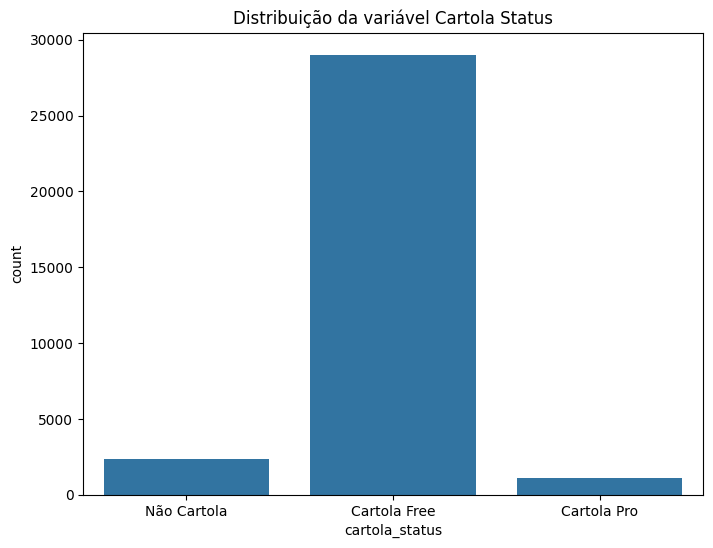

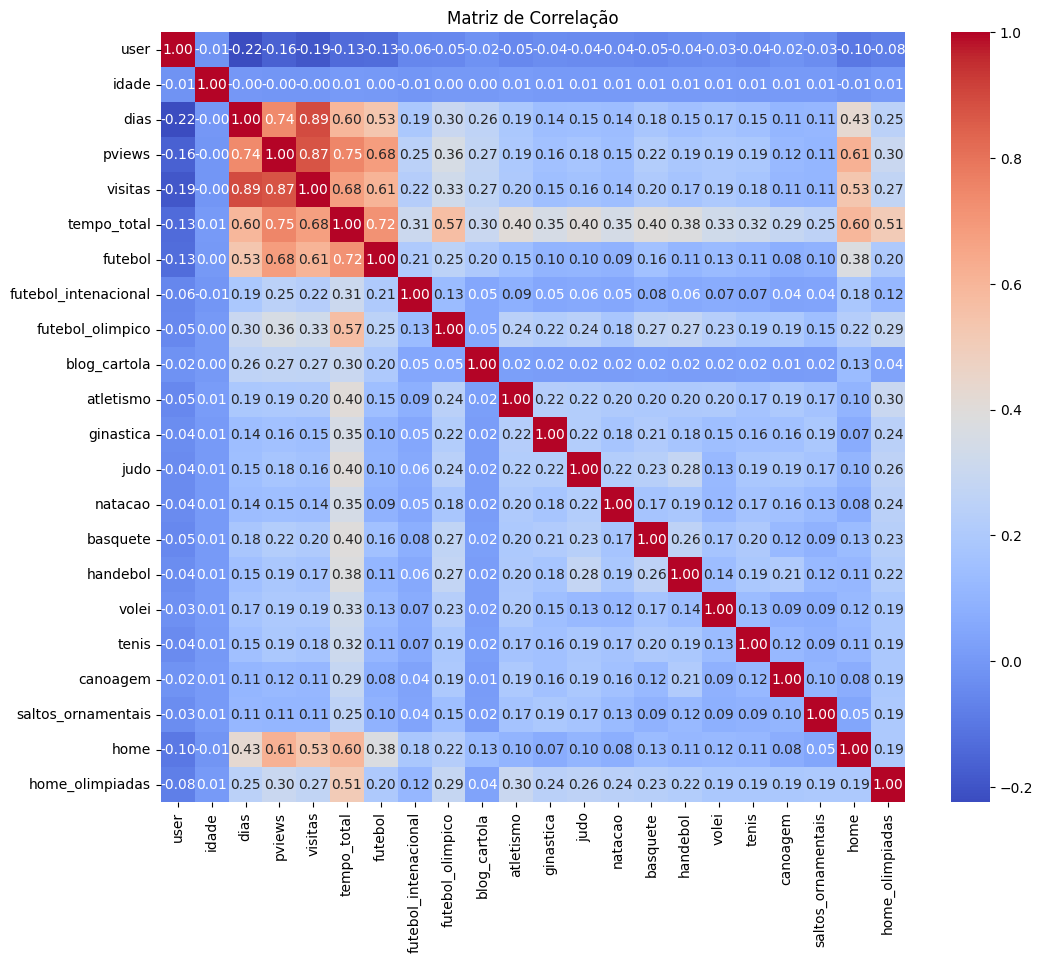

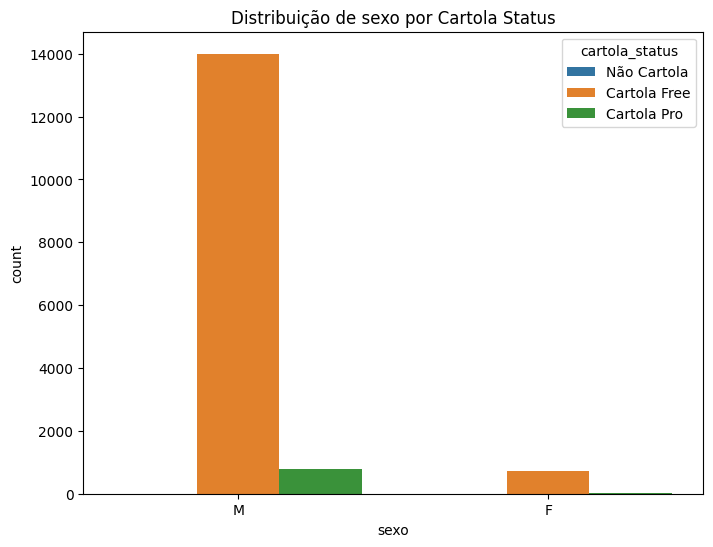

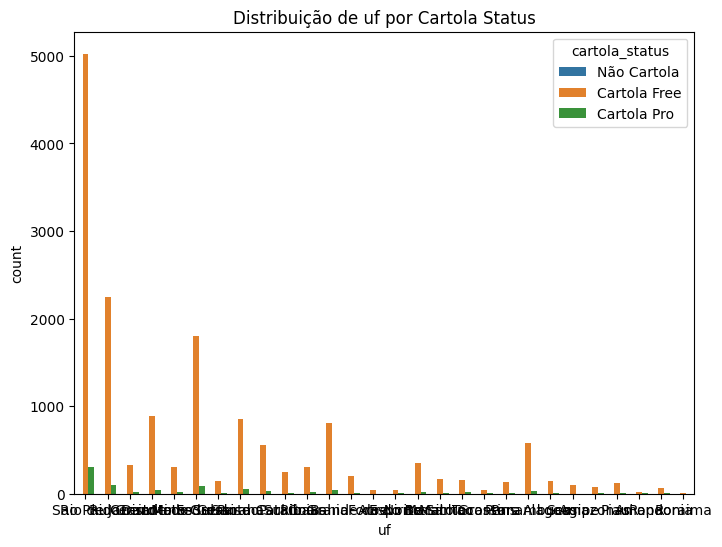

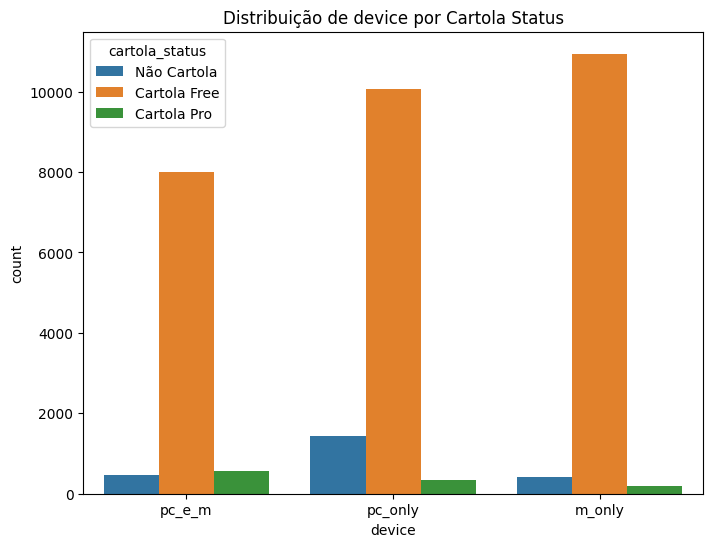

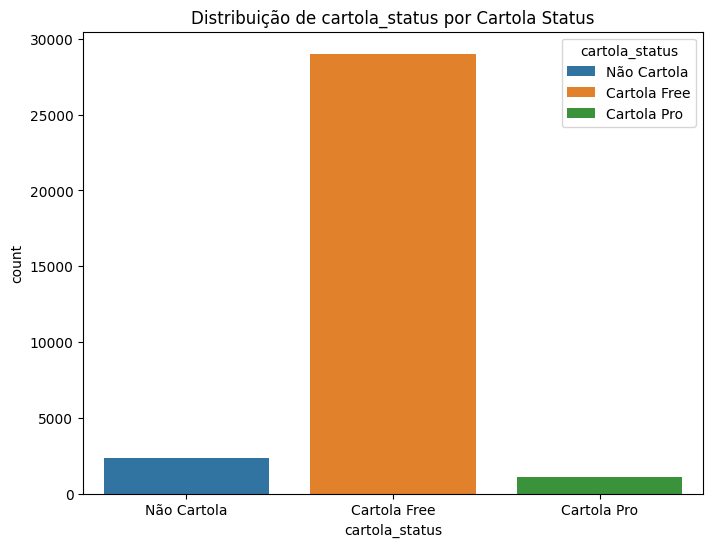

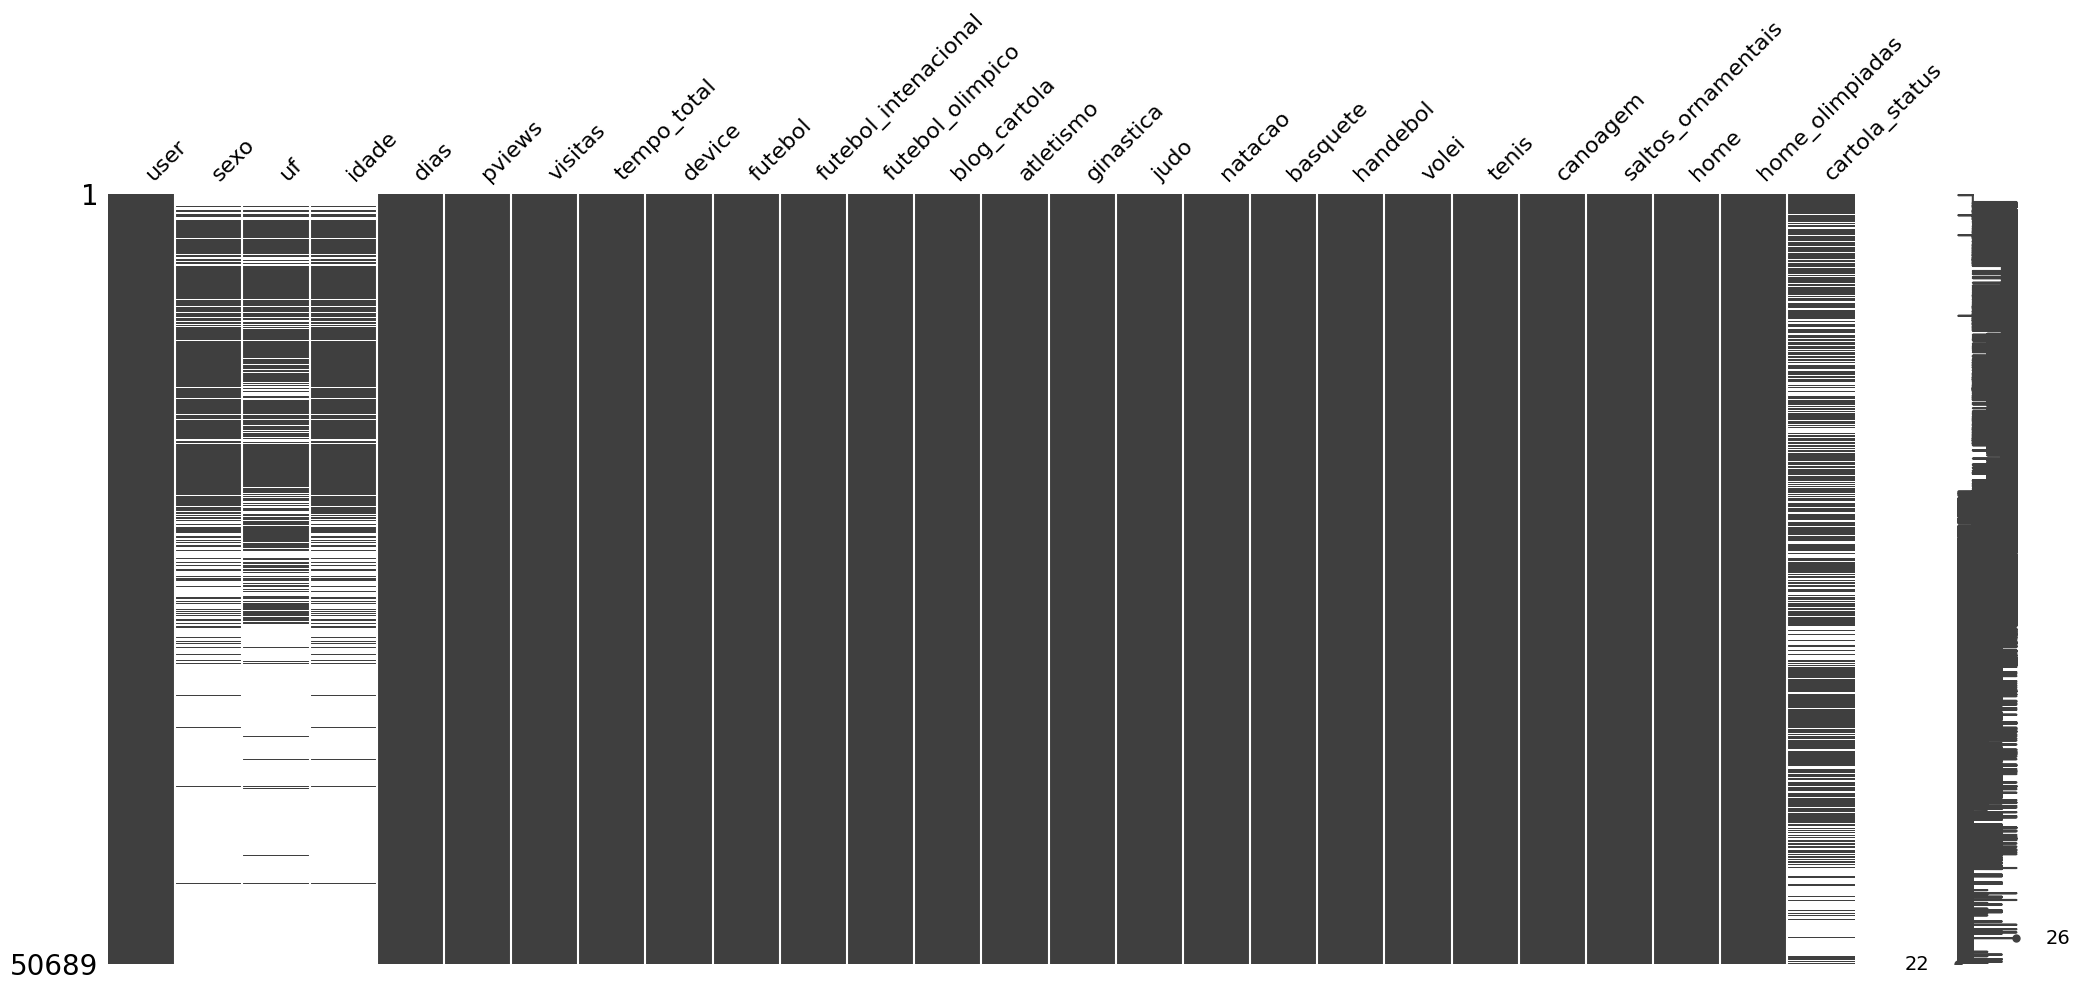


Estatísticas descritivas para Cartola Status = Não Cartola


,user,idade,dias,pviews,visitas,tempo_total,futebol,futebol_intenacional,futebol_olimpico,blog_cartola,...,judo,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas
count,2.336000e+03,0.0,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,...,2336.000000,2336.00000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,3.076255e+07,NaN,7.319777,35.479024,13.329195,11934.019876,2628.521490,162.436640,1262.390505,5.864289,...,555.489683,507.92503,380.931982,332.590484,426.527059,198.067744,195.856717,232.633985,613.133065,1143.547607
std,2.062910e+07,NaN,7.155062,66.996938,19.596135,27937.430694,9727.509073,1660.908714,4421.491553,85.067091,...,3502.246133,2310.39305,2231.712993,1962.859508,2640.716911,1292.136180,1376.995020,1379.382340,3564.865692,4659.670795
min,1.912357e+06,NaN,1.000000,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.749027e+07,NaN,2.000000,3.000000,2.000000,135.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.941321e+07,NaN,5.000000,10.000000,6.000000,1231.426000,45.000000,0.000000,45.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,4.570741e+07,NaN,11.000000,37.000000,16.000000,9115.524500,754.065000,0.000000,309.742500,0.000000,...,45.000000,45.00000,45.000000,0.000000,45.000000,0.000000,0.000000,45.000000,58.920000,339.727500
max,7.602514e+07,NaN,31.000000,740.000000,192.000000,219607.340000,152485.450000,56069.230000,91300.600000,2702.900000,...,94089.570000,39713.30000,57750.510000,31557.800000,86232.040000,26587.310000,40363.990000,34665.950000,87439.140000,91829.280000



Estatísticas descritivas para Cartola Status = Cartola Free


,user,idade,dias,pviews,visitas,tempo_total,futebol,futebol_intenacional,futebol_olimpico,blog_cartola,...,judo,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas
count,2.901900e+04,14870.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,...,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000,29019.000000
mean,5.628042e+07,26.607532,9.733003,66.014025,19.994521,12308.553281,4576.905091,332.934032,850.930316,1310.305307,...,206.109183,175.008263,201.559704,158.771193,138.360037,95.499666,79.373980,69.900202,2265.349809,468.170775
std,1.436480e+07,59.692729,8.763905,120.890539,27.415095,27020.756515,11646.710047,2550.227428,3426.128270,5309.134513,...,1734.168797,1689.212704,1377.328765,1248.946842,1019.223780,864.618843,737.701202,741.238990,7503.462217,2262.973275
min,1.919933e+06,-7161.000000,1.000000,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.416779e+07,21.000000,2.000000,5.000000,3.000000,225.000000,0.000000,0.000000,0.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.844618e+07,26.000000,6.000000,18.000000,8.000000,1737.769000,260.810000,0.000000,0.000000,109.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
75%,6.906310e+07,31.000000,16.000000,70.000000,26.000000,10187.529000,3405.145000,3.565000,117.880000,749.920000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,942.320000,78.590000
max,7.603601e+07,236.000000,31.000000,2143.000000,277.000000,225690.794000,178642.600000,161337.180000,144780.570000,196982.900000,...,84762.310000,170804.680000,77564.290000,104274.180000,67556.540000,84894.920000,31590.810000,84184.830000,192745.560000,101053.640000



Estatísticas descritivas para Cartola Status = Cartola Pro


,user,idade,dias,pviews,visitas,tempo_total,futebol,futebol_intenacional,futebol_olimpico,blog_cartola,...,judo,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas
count,1.077000e+03,818.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,4.727687e+07,30.268949,14.834726,138.758589,34.847725,27127.952852,10451.272999,419.514624,1660.359935,3198.828357,...,576.504513,606.719963,536.436806,347.438366,219.113343,237.723890,194.961272,190.494290,4320.776342,990.925608
std,1.386131e+07,8.667447,9.225821,183.371358,35.312559,41100.886102,17948.903983,1559.007025,4483.087316,8122.618913,...,3341.483236,5293.193831,2884.617980,1712.422224,817.681524,1145.190856,1062.105334,1122.363714,9886.125502,2820.613683
min,1.979452e+06,13.000000,1.000000,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.619239e+07,24.000000,7.000000,19.000000,8.000000,1663.681000,218.720000,0.000000,0.000000,48.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.730804e+07,29.000000,14.000000,71.000000,23.000000,9187.169000,2981.620000,0.000000,45.000000,411.680000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.740000,45.000000
75%,5.744240e+07,34.000000,23.000000,180.000000,49.000000,33171.990000,12176.800000,88.330000,861.920000,2488.140000,...,45.000000,45.000000,45.000000,0.000000,45.000000,0.000000,0.000000,0.000000,3755.120000,590.750000
max,7.578954e+07,73.000000,31.000000,1382.000000,229.000000,219576.758000,136621.340000,17779.650000,57749.360000,94311.630000,...,69072.940000,161195.810000,70477.820000,20965.620000,10442.670000,12959.830000,18464.650000,21608.740000,122883.330000,28545.580000



Estatísticas descritivas para Cartola Status = nan


,user,idade,dias,pviews,visitas,tempo_total,futebol,futebol_intenacional,futebol_olimpico,blog_cartola,...,judo,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


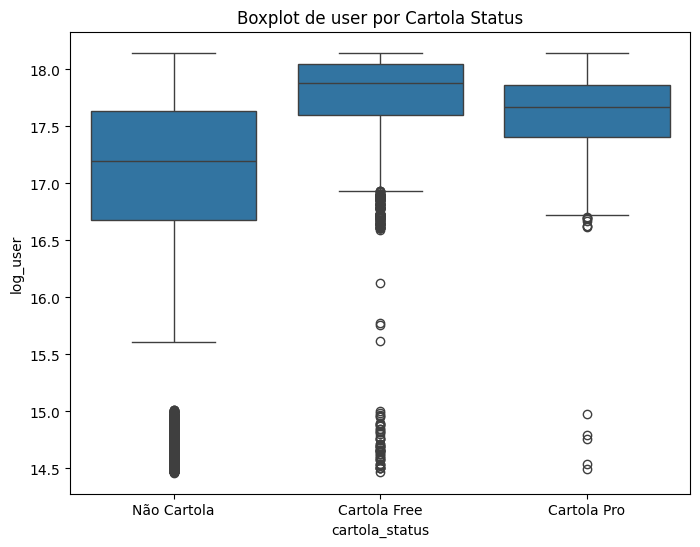

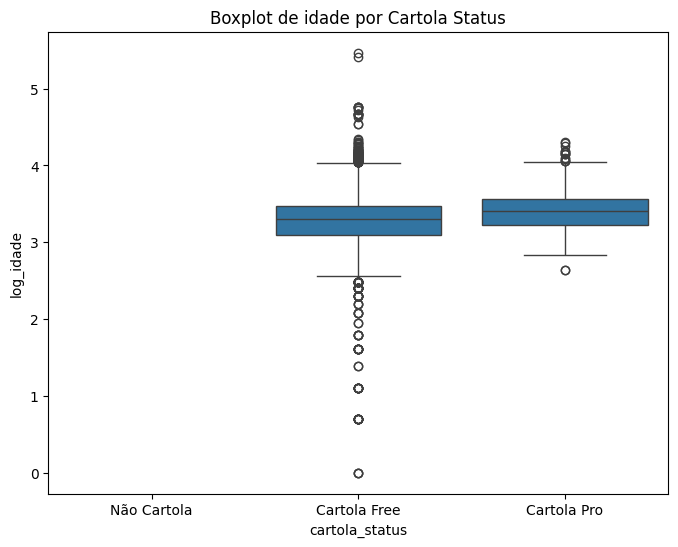

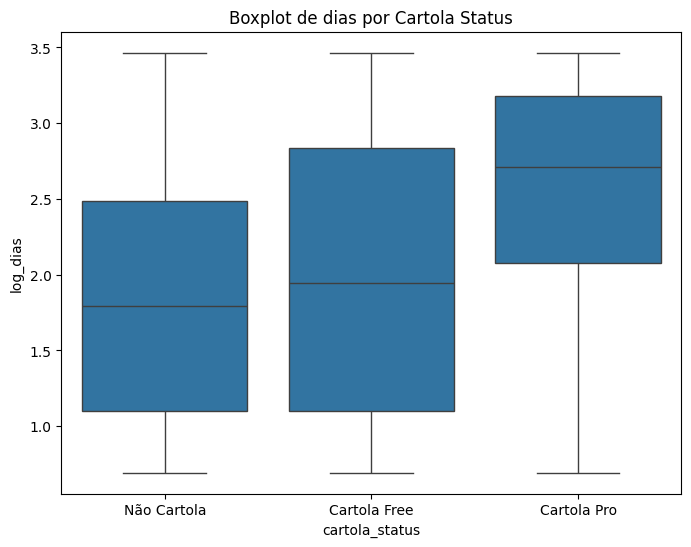

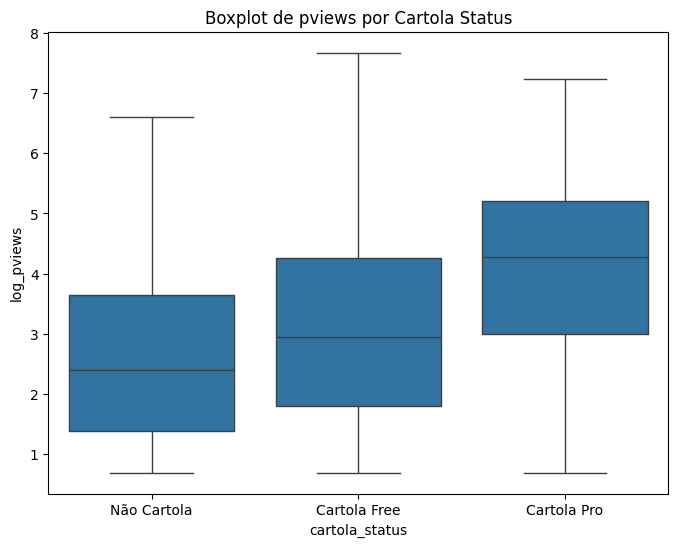

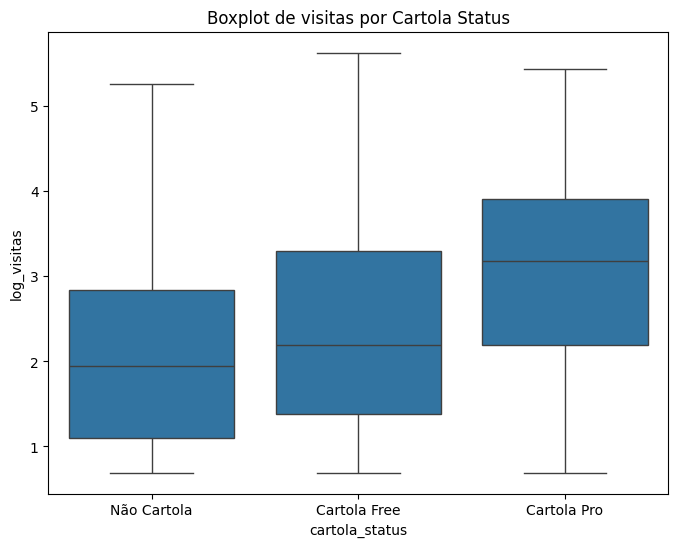

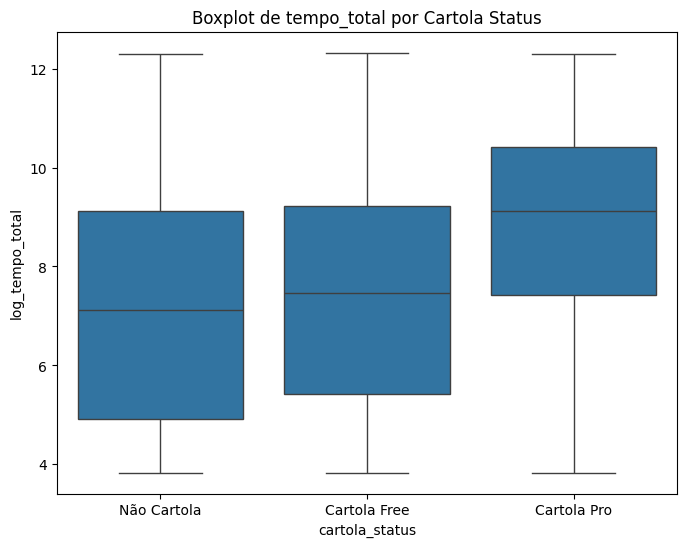

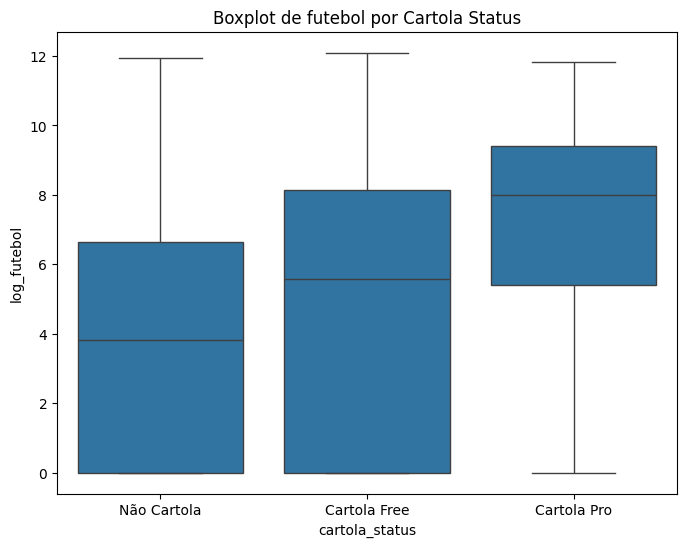

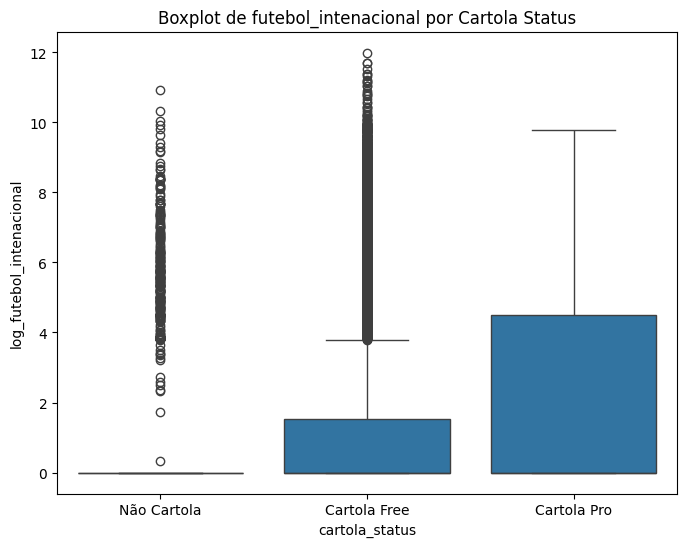

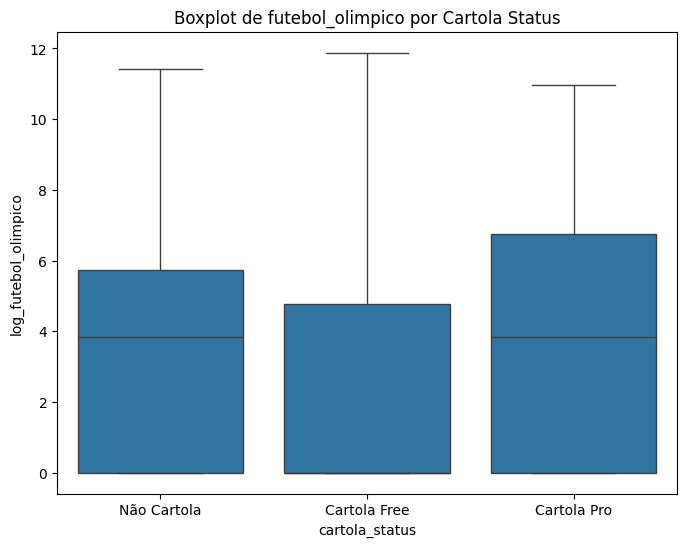

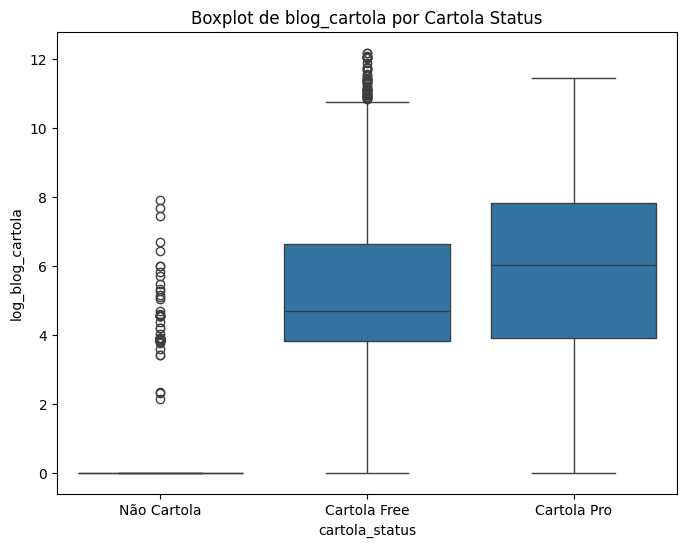

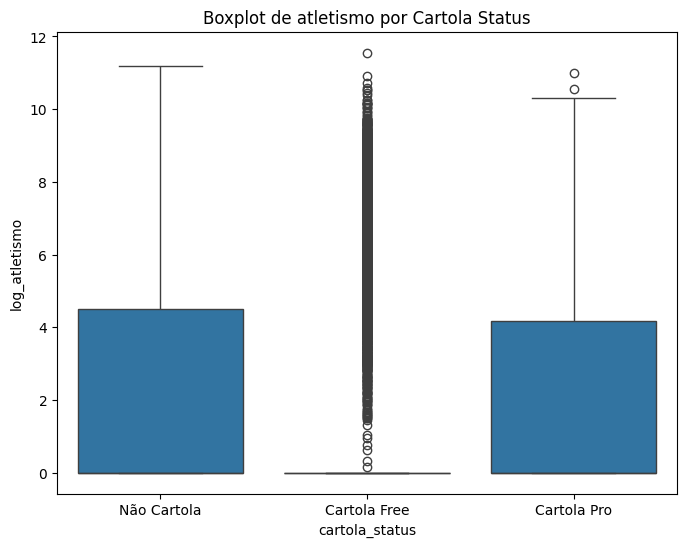

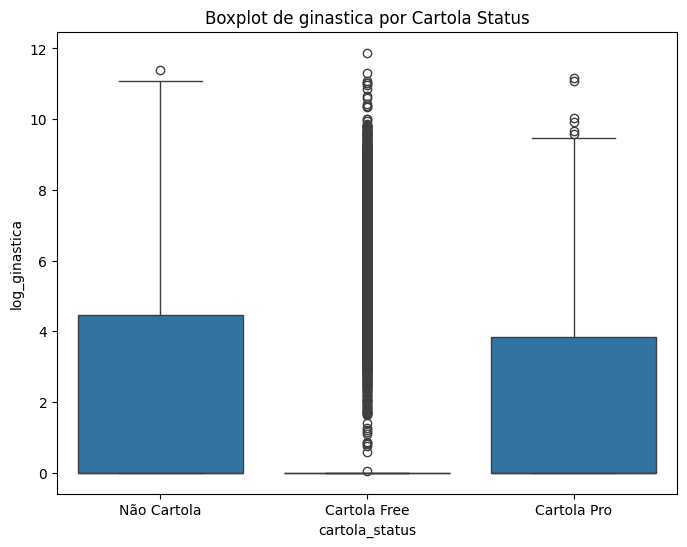

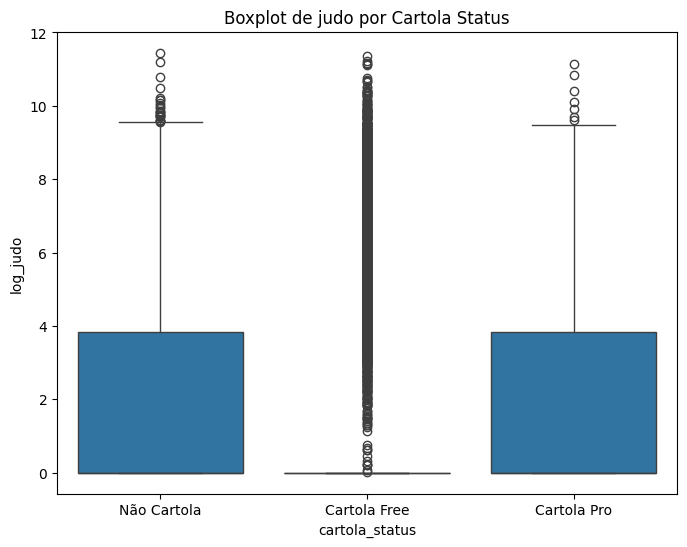

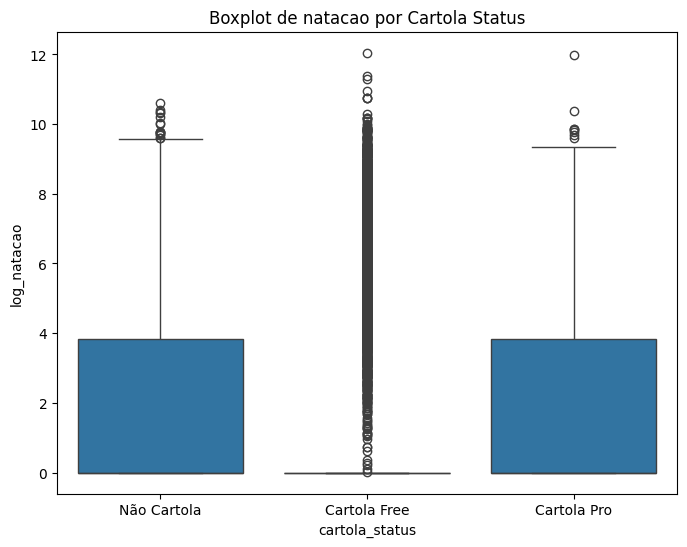

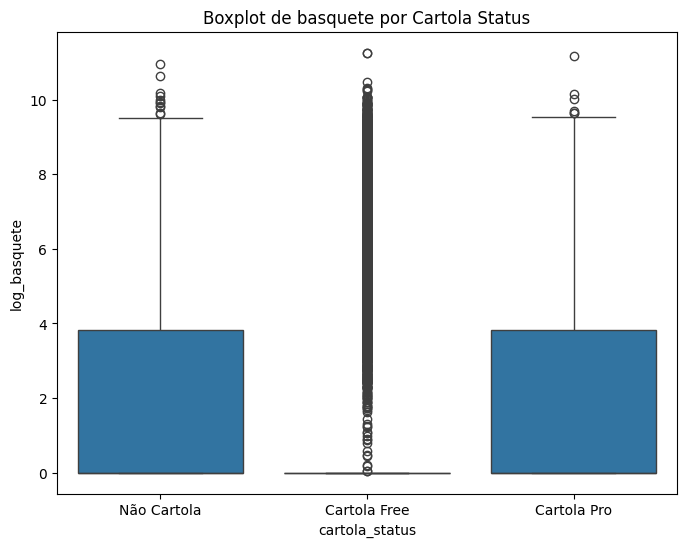

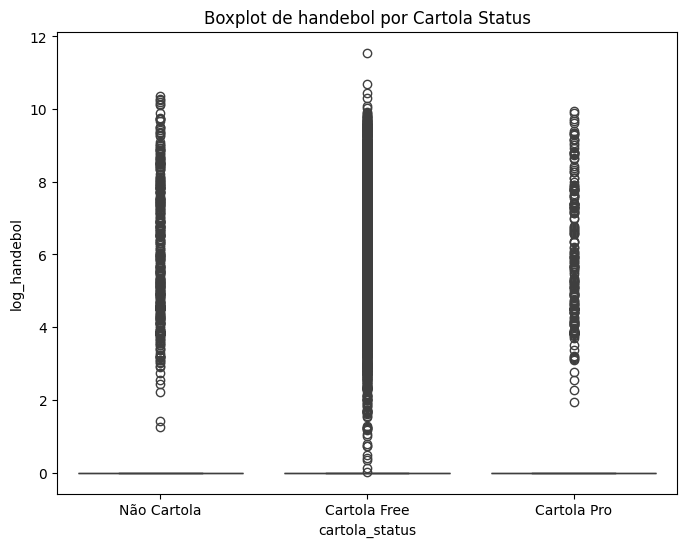

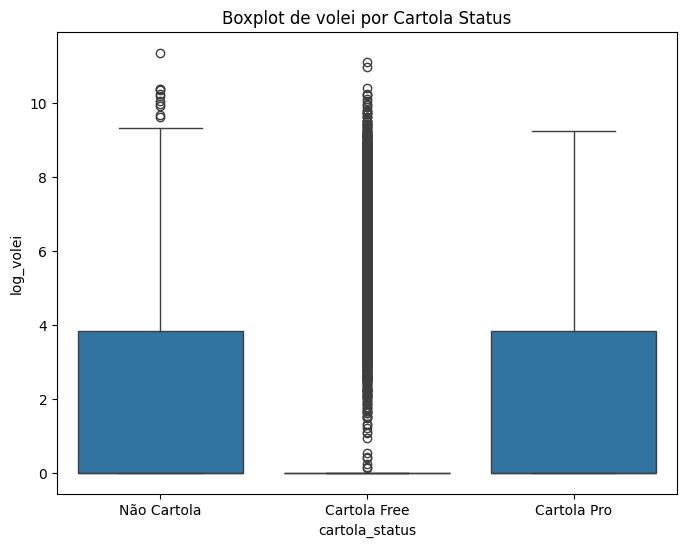

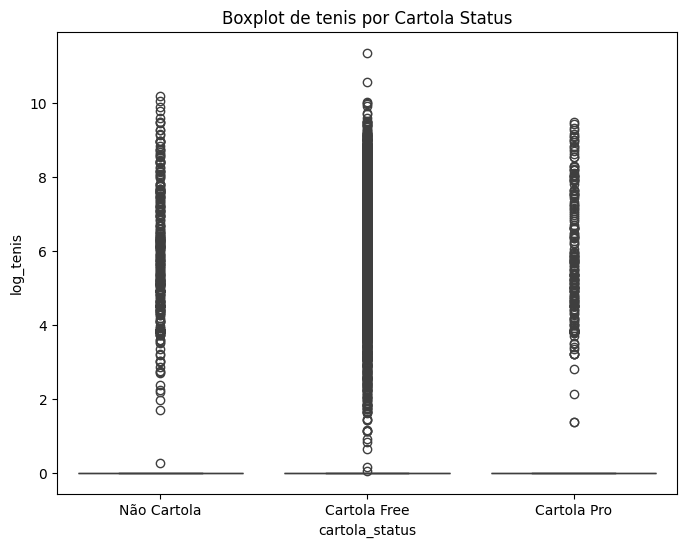

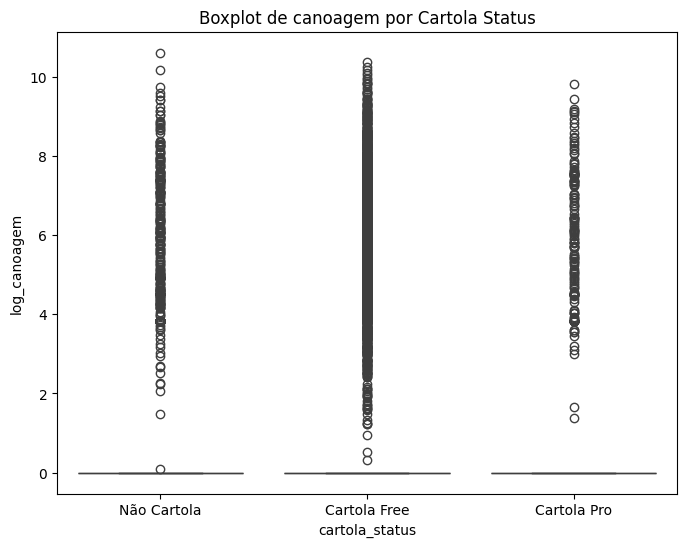

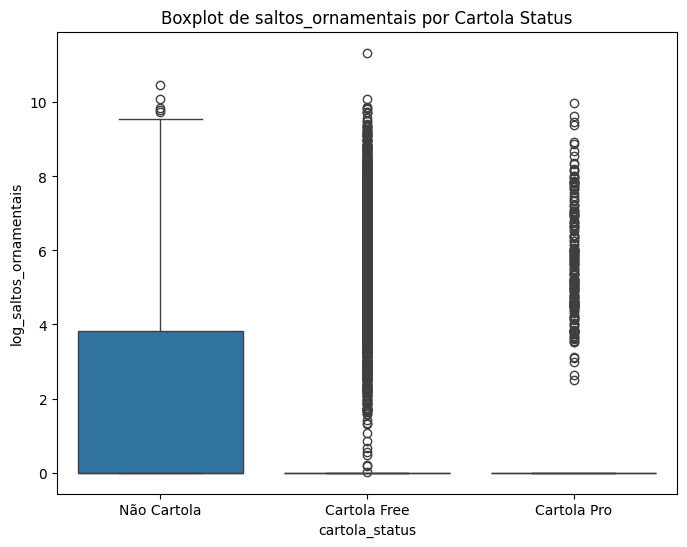

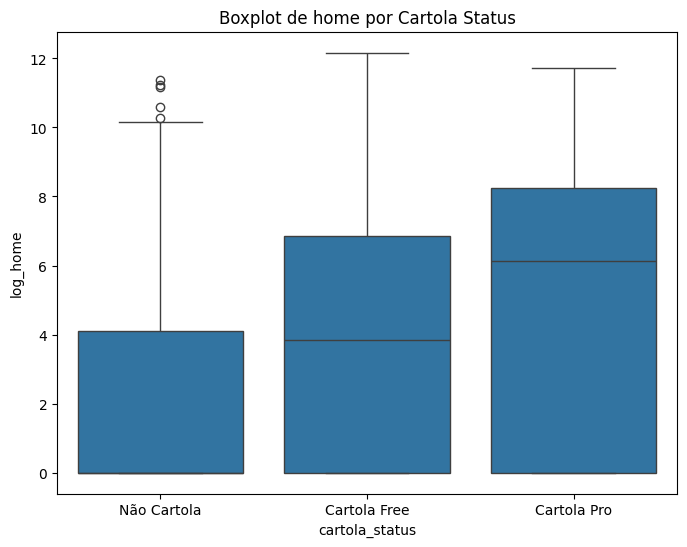

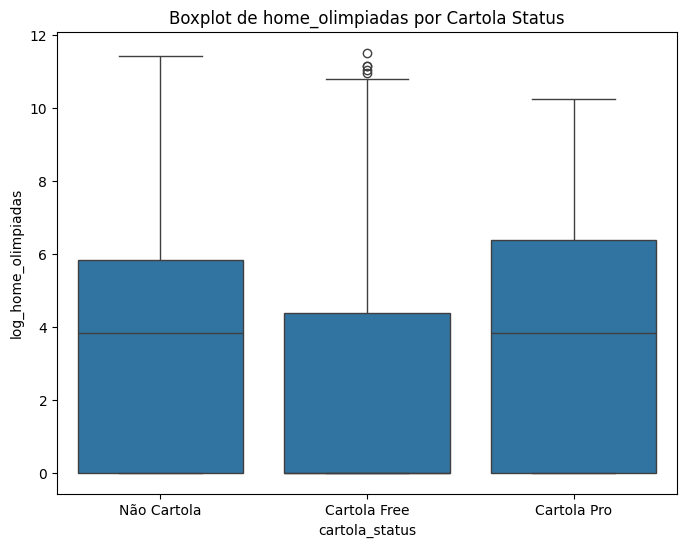

In [ ]:
# 1. Distribuição da variável target
display(df['cartola_status'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='cartola_status', data=df)
plt.title('Distribuição da variável Cartola Status')
plt.show()

# 2. Análise de correlação entre a variável target e outras variáveis numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# 3. Análise da relação entre a variável target e variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, hue='cartola_status', data=df)
  plt.title(f'Distribuição de {col} por Cartola Status')
  plt.show()

# 4. Análise de valores ausentes
msno.matrix(df)
plt.show()

# 5. Estatísticas descritivas para cada valor da variável target
for status in df['cartola_status'].unique():
  print(f"\nEstatísticas descritivas para Cartola Status = {status}")
  display(df[df['cartola_status'] == status].describe())

# 6. Boxplots para comparar a distribuição de variáveis numéricas entre diferentes valores da variável target
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  df['log_'+ col] = np.log(df[col] + 1)
  sns.boxplot(x='cartola_status', y='log_'+ col, data=df)
  plt.title(f'Boxplot de {col} por Cartola Status')
  plt.show()

df.drop(columns=[col for col in df.columns if col.startswith('log_')], inplace=True)

## Testes de hipoteses

In [ ]:
df[['dias', 'pviews', 'visitas', 'tempo_total']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
dias,50689.0,8.54,8.20,1.0,2.0,5.00,13.00,31.00
pviews,50689.0,56.69,109.42,1.0,4.0,15.00,58.00,2143.00
visitas,50689.0,17.15,24.83,1.0,2.0,7.00,21.00,277.00
tempo_total,50689.0,12637.41,27908.55,45.0,180.0,1671.58,10349.22,225690.79


In [ ]:
subset = df[['dias', 'pviews', 'visitas', 'tempo_total','cartola_status']]
display(subset.groupby('cartola_status').describe().round(2).T)

cartola_status     Cartola Free  Cartola Pro  Não Cartola
dias        count      29019.00      1077.00      2336.00
            mean           9.73        14.83         7.32
            std            8.76         9.23         7.16
            min            1.00         1.00         1.00
            25%            2.00         7.00         2.00
            50%            6.00        14.00         5.00
            75%           16.00        23.00        11.00
            max           31.00        31.00        31.00
pviews      count      29019.00      1077.00      2336.00
            mean          66.01       138.76        35.48
            std          120.89       183.37        67.00
            min            1.00         1.00         1.00
            25%            5.00        19.00         3.00
            50%           18.00        71.00        10.00
            75%           70.00       180.00        37.00
            max         2143.00      1382.00       740.00
visitas     count      29019.00      1077.00      2336.00
            mean          19.99        34.85        13.33
            std           27.42        35.31        19.60
            min            1.00         1.00         1.00
            25%            3.00         8.00         2.00
            50%            8.00        23.00         6.00
            75%           26.00        49.00        16.00
            max          277.00       229.00       192.00
tempo_total count      29019.00      1077.00      2336.00
            mean       12308.55     27127.95     11934.02
            std        27020.76     41100.89     27937.43
            min           45.00        45.00        45.00
            25%          225.00      1663.68       135.00
            50%         1737.77      9187.17      1231.43
            75%        10187.53     33171.99      9115.52
            max       225690.79    219576.76    219607.34

### Teste de hipóteses Estatísticas

**Médias**

Teste se a média de uma variável numérica é significativamente diferente entre as categorias de cartola_status.

Hipótese nula (H0): A média de uma variável (ex. dias) é igual entre os grupos.

Hipótese alternativa (H1): A média de uma variável (ex. dias) é diferente entre os grupos.

In [ ]:
# Suponha que você quer testar a variável 'dias'
grupo_free = subset[subset['cartola_status'] == 'Cartola Free']['dias']
grupo_nao_cartola = subset[subset['cartola_status'] == 'Não Cartola']['dias']
grupo_pro = subset[subset['cartola_status'] == 'Cartola Pro']['dias']

# Teste ANOVA
anova_result = stats.f_oneway(grupo_free, grupo_nao_cartola, grupo_pro)
print('ANOVA resultado para dias:', anova_result)


ANOVA resultado para dias: F_onewayResult(statistic=276.6908184720598, pvalue=7.054439809173509e-120)


Interpretação:

Com uma estatística F muito alta e um valor p muito pequeno, rejeitamos a hipótese nula de que as médias dos dias são iguais para os três grupos de cartola_status. Isso significa que há evidências estatísticas muito fortes de que pelo menos um dos grupos (Cartola Free, Não Cartola, Cartola Pro) tem uma média de dias significativamente diferente dos outros.

In [ ]:
# Teste de Kruskal-Wallis
kruskal_result = stats.kruskal(grupo_free, grupo_nao_cartola, grupo_pro)
print('Teste de Kruskal-Wallis para dias:', kruskal_result)

Teste de Kruskal-Wallis para dias: KruskalResult(statistic=521.139875917359, pvalue=6.85352173901054e-114)


Interpretação:

Com uma estatística alta e um valor p extremamente pequeno, rejeitamos a hipótese nula de que as distribuições de dias são iguais entre os grupos Cartola Free, Não Cartola e Cartola Pro. Ou seja, há evidências estatísticas muito fortes de que as distribuições de dias são significativamente diferentes entre pelo menos dois dos grupos de cartola_status.

In [ ]:
# Teste de Levene para igualdade de variâncias
levene_result = stats.levene(grupo_free, grupo_nao_cartola, grupo_pro)
print('Teste de Levene para dias:', levene_result)

Teste de Levene para dias: LeveneResult(statistic=97.6292344624283, pvalue=5.337023226015229e-43)


Interpretação:

Com uma estatística alta e um valor p extremamente pequeno, rejeitamos a hipótese nula de que as variâncias de dias são iguais entre os grupos Cartola Free, Não Cartola e Cartola Pro. Isso significa que há fortes evidências de que as variâncias (ou a dispersão dos dias) são significativamente diferentes entre pelo menos dois dos grupos.

In [ ]:
# Suponha que você quer testar a variável 'dias'
grupo_free = subset[subset['cartola_status'] == 'Cartola Free']['pviews']
grupo_nao_cartola = subset[subset['cartola_status'] == 'Não Cartola']['pviews']
grupo_pro = subset[subset['cartola_status'] == 'Cartola Pro']['pviews']

# Teste ANOVA
anova_result = stats.f_oneway(grupo_free, grupo_nao_cartola, grupo_pro)
print('ANOVA resultado para pviews:', anova_result)

ANOVA resultado para pviews: F_onewayResult(statistic=271.27547995939494, pvalue=1.4495537388154063e-117)


Interpretação:

Com uma estatística F muito alta e um valor p extremamente baixo, rejeitamos a hipótese nula de que as médias de pviews são iguais para os três grupos de cartola_status. Isso significa que existe evidência estatística muito forte de que pelo menos um dos grupos (Cartola Free, Não Cartola, Cartola Pro) tem uma média de visualizações (pviews) significativamente diferente dos outros.

In [ ]:
# Teste de Kruskal-Wallis
kruskal_result = stats.kruskal(grupo_free, grupo_nao_cartola, grupo_pro)
print('Teste de Kruskal-Wallis para pviews:', kruskal_result)

Teste de Kruskal-Wallis para pviews: KruskalResult(statistic=651.6191340314067, pvalue=3.1820199179043494e-142)


Interpretação:

Com uma estatística muito alta e um valor p extremamente baixo, rejeitamos a hipótese nula de que as distribuições de pviews são iguais entre os grupos Cartola Free, Não Cartola e Cartola Pro. Ou seja, há evidências estatísticas muito fortes de que as distribuições de visualizações (pviews) são significativamente diferentes entre os grupos.

In [ ]:
# Teste de Levene para igualdade de variâncias
levene_result = stats.levene(grupo_free, grupo_nao_cartola, grupo_pro)
print('Teste de Levene para pviews:', levene_result)

Teste de Levene para pviews: LeveneResult(statistic=191.19014544338154, pvalue=2.837220964299255e-83)


In [ ]:
# Suponha que você quer testar a variável 'dias'
grupo_free = subset[subset['cartola_status'] == 'Cartola Free']['visitas']
grupo_nao_cartola = subset[subset['cartola_status'] == 'Não Cartola']['visitas']
grupo_pro = subset[subset['cartola_status'] == 'Cartola Pro']['visitas']

# Teste ANOVA
anova_result = stats.f_oneway(grupo_free, grupo_nao_cartola, grupo_pro)
print('ANOVA resultado para visitas:', anova_result)

ANOVA resultado para visitas: F_onewayResult(statistic=230.17772955971745, pvalue=5.469890907244939e-100)


Interpretação:

Com uma estatística F alta e um valor p extremamente baixo, rejeitamos a hipótese nula de que as médias de visitas são iguais para os três grupos de cartola_status. Ou seja, há fortes evidências estatísticas de que pelo menos um dos grupos (Cartola Free, Não Cartola, Cartola Pro) tem uma média de visitas significativamente diferente dos outros.

In [ ]:
# Teste de Kruskal-Wallis
kruskal_result = stats.kruskal(grupo_free, grupo_nao_cartola, grupo_pro)
print('Teste de Kruskal-Wallis para visitas:', kruskal_result)

Teste de Kruskal-Wallis para visitas: KruskalResult(statistic=516.6092923633344, pvalue=6.602638399561736e-113)


Interpretação:

Com uma estatística do teste alta e um valor p muito baixo, rejeitamos a hipótese nula de que as distribuições de visitas são iguais entre os grupos Cartola Free, Não Cartola, e Cartola Pro. Isso indica que há evidências estatísticas muito fortes de que as distribuições de visitas são significativamente diferentes entre pelo menos dois dos grupos de cartola_status.

In [ ]:
# Teste de Levene para igualdade de variâncias
levene_result = stats.levene(grupo_free, grupo_nao_cartola, grupo_pro)
print('Teste de Levene para visitas:', levene_result)

Teste de Levene para visitas: LeveneResult(statistic=132.8534711333013, pvalue=3.447939333555064e-58)


Interpretação:

Com uma estatística de teste alta e um valor p extremamente baixo, rejeitamos a hipótese nula de que as variâncias de visitas são iguais entre os grupos Cartola Free, Não Cartola, e Cartola Pro. Isso significa que há evidências estatísticas muito fortes de que a variabilidade (ou dispersão) das visitas é significativamente diferente entre os grupos.

## Avalição das proporções dos dados nulos

In [ ]:
null_proportion = df.isnull().mean().sort_values(ascending=False)
tabela_nula = null_proportion.reset_index(name='proportion_null')
tabela = tabela_nula[tabela_nula['proportion_null'] > 0]
display(tabela)

,index,proportion_null
0,uf,0.574681
1,sexo,0.557300
2,idade,0.553828
3,cartola_status,0.360177


### Verificação da variavel UF

In [ ]:
df.uf.value_counts(normalize=True).reset_index().head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
uf,Sao Paulo,Rio de Janeiro,Minas Gerais,Parana,Rio Grande do Sul,Bahia,Santa Catarina,Pernambuco,Distrito Federal,Espirito Santo,Ceara,Goias,Paraiba,Rio Grande do Norte,Maranhao
proportion,0.308873,0.155759,0.109328,0.055058,0.054548,0.048332,0.036504,0.033536,0.02361,0.022033,0.021569,0.019945,0.0154,0.012802,0.010158


### Verificação da variavel Sexo

In [ ]:
df.sexo.value_counts(normalize=True).reset_index()

,sexo,proportion
0,M,0.897549
1,F,0.102451


### Verificação da variavel Idade

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
idade,22616.0,29.31,49.14,-7161.0,22.0,27.0,35.0,236.0


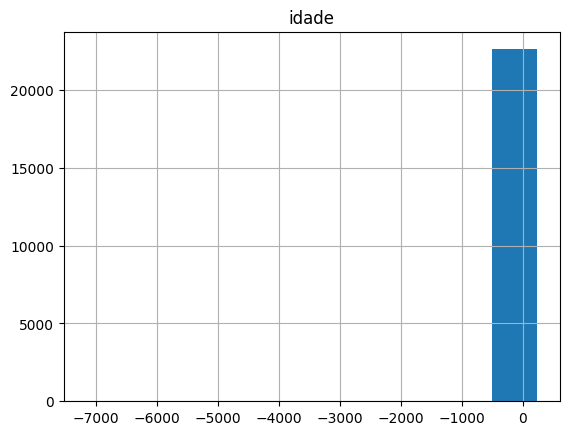

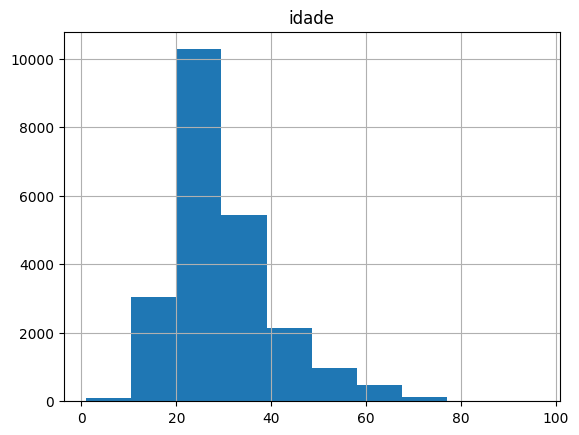

In [ ]:
display(df.idade.describe().round(2).reset_index().T)
df[['idade']].hist(bins=10)
plt.show()
df[['idade']][(df.idade>0) & (df.idade<100)].hist(bins=10)
plt.show()

### Verificação da variavel target: cartola_status

In [ ]:
df.cartola_status.value_counts(normalize=True).reset_index()

,cartola_status,proportion
0,Cartola Free,0.894764
1,Não Cartola,0.072028
2,Cartola Pro,0.033208


In [ ]:
qtd = df['cartola_status'].isnull().sum()
print(f"Qtd. de valores nulos na variável 'cartola_status' é: {qtd}")

Qtd. de valores nulos na variável 'cartola_status' é: 18257


In [ ]:
cartola_status_null_proportion = df['cartola_status'].isnull().mean().round(4)*100
print(f"A proporção de valores nulos na variável 'cartola_status' é: {cartola_status_null_proportion} %")

A proporção de valores nulos na variável 'cartola_status' é: 36.02 %


## Estratégia de preprocessamento

In [ ]:
# Dados com classificação entram no processo de treinamento de modelos:
dataset = df[df['cartola_status'].notnull()]

# Dados para criar a lista para previsões:
validacao = df[df['cartola_status'].isnull()]

In [ ]:
def preprocessamento(dataset):
  # Ajuste dos valores da idade de acordo com a AED:
  dataset['idade'].fillna(dataset['idade'].mean(), inplace=True)
  dataset['idade'] = dataset['idade'].replace(0, dataset['idade'].median())
  dataset.loc[(dataset.idade < 0) | (dataset.idade > 100), 'idade'] = dataset.idade.median()

  # Preencher valores nulos de 'UF' e 'sexo' com os valores mais frequentes
  dataset['uf'].fillna(dataset['uf'].mode()[0], inplace=True)
  dataset['sexo'].fillna(dataset['sexo'].mode()[0], inplace=True)

  # Criação do One-Hot Encoder para a variável 'device'
  device_dummies = pd.get_dummies(dataset['device'], prefix='device')

  # Concatenação das colunas do One-Hot Encoder com o dataset
  dataset = pd.concat([dataset, device_dummies], axis=1)

  # Remoção da coluna original 'device'
  dataset = dataset.drop('device', axis=1)

  # Cria um objeto LabelEncoder
  le = LabelEncoder()

  # Ajusta e transforma a coluna 'sexo'
  dataset['sexo'] = le.fit_transform(dataset['sexo'])

  # Cria a coluna 'loca_uf' com base na coluna 'uf'
  dataset['loca_uf'] = np.where(dataset['uf'] == 'Sao Paulo', 1, 0)

  # Remoção da coluna original 'uf'
  dataset = dataset.drop('uf', axis=1)

  return le, dataset

In [ ]:
le, dataset = preprocessamento(dataset)
le, validacao = preprocessamento(validacao)
validacao.drop(columns=['cartola_status'], inplace=True)

In [ ]:
# Lista de colunas a serem normalizadas
cols_to_normalize = ['idade','dias', 'pviews', 'visitas', 'tempo_total', 'futebol', 'futebol_intenacional', \
                     'futebol_olimpico', 'blog_cartola', 'atletismo', 'ginastica', 'judo', 'natacao', 'basquete',\
                     'handebol', 'volei', 'tenis', 'canoagem', 'saltos_ornamentais', 'home', 'home_olimpiadas']

# Cria um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta e transforma as colunas selecionadas no dataset
dataset[cols_to_normalize] = scaler.fit_transform(dataset[cols_to_normalize])

# Ajusta e transforma as colunas selecionadas no dataset de validação
validacao[cols_to_normalize] = scaler.transform(validacao[cols_to_normalize])


In [ ]:
# Criando uma nova coluna 'cartola_pro' com valores binários (1 para Cartola Pro, 0 para o resto)
dataset['target'] = np.where(dataset['cartola_status'] == 'Cartola Pro', 1, 0)

# Removendo a coluna original 'cartola_status' (opcional, se não for mais necessária)
dataset = dataset.drop('cartola_status', axis=1)

# Exibindo as primeiras linhas para verificar a transformação
print(dataset[['target']].value_counts(normalize=True))


target
0         0.966792
1         0.033208
Name: proportion, dtype: float64


In [ ]:
# Separar as features (X) e o target (y)
X = dataset.drop(['user', 'target'], axis=1)
y = dataset['target']

## Detecção de dados anomalos com modelo de cluster DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)
outliers = pd.DataFrame(labels.tolist(),columns=['cluster'])
outliers['ruido'] = outliers['cluster'].apply(lambda x: 0 if x == -1 else 1)
outliers.drop(columns=['cluster'], inplace=True)
X = pd.concat([X.reset_index(drop=True), outliers.reset_index(drop=True)], axis=1)

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(validacao)
outliers = pd.DataFrame(labels.tolist(),columns=['cluster'])
outliers['ruido'] = outliers['cluster'].apply(lambda x: 0 if x == -1 else 1)
outliers.drop(columns=['cluster'], inplace=True)
validacao = pd.concat([validacao.reset_index(drop=True), outliers.reset_index(drop=True)], axis=1)

## Seleção de variaveis, divisão do dataset e balanceamento da variável target.

In [ ]:
# Usar SelectKBest para selecionar as k melhores features
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Obter os nomes das features selecionadas
selected_features = X.columns[selector.get_support()]

# Imprimir as features selecionadas
print("Features selecionadas:", selected_features.tolist())

X = X[selected_features]

cluster_centroids = ClusterCentroids()
X_resampled, y_resampled = cluster_centroids.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_resampled))

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=5478)
X_resampled, y_resampled = cluster_centroids.fit_resample(X, y)


Features selecionadas: ['idade', 'dias', 'pviews', 'visitas', 'tempo_total', 'futebol', 'futebol_olimpico', 'blog_cartola', 'natacao', 'basquete', 'home', 'device_m_only', 'device_pc_e_m', 'loca_uf', 'ruido']
Resampled dataset shape Counter({0: 1077, 1: 1077})


## Seleção do modelo

In [ ]:
def test_models(X_train, y_train, X_test, y_test):
    """Testa vários modelos de árvore, regressão logística e boostings, balanceando as classes.

    Args:
        X_train: Conjunto de treinamento de features.
        y_train: Conjunto de treinamento de target.
        X_test: Conjunto de teste de features.
        y_test: Conjunto de teste de target.

    Returns:
        Um dicionário com os resultados dos modelos e os parâmetros do melhor modelo com base na métrica de acurácia.
    """

    models = {
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
        'Logistic Regression': LogisticRegression(class_weight='balanced'),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)
    }

    results = {}
    best_model_name = None
    best_accuracy_score = 0
    best_model_params = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'params': model.get_params()  # Obtém os parâmetros do modelo
        }

        # Verifica se este modelo tem a melhor pontuação de acurácia
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_model_name = model_name
            best_model_params = model.get_params()
            best_y_pred = y_pred  # Armazena as previsões do melhor modelo

    return results, best_model_name, best_accuracy_score, best_model_params, best_y_pred, model

# Exemplo de uso:
results, best_model_name, best_accuracy_score, best_model_params, best_y_pred, model = test_models(X_train, y_train, X_test, y_test)

# Exibindo os resultados dos modelos
for model_name, metrics in results.items():
    print(f"Modelo: {model_name}")
    for metric_name, value in metrics.items():
        if metric_name != 'params':
            print(f"  {metric_name}: {value:.4f}")


Modelo: Decision Tree
  accuracy: 0.8538
  precision: 0.8465
  recall: 0.8733
  f1: 0.8597
  roc_auc: 0.8533
Modelo: Logistic Regression
  accuracy: 0.8121
  precision: 0.8043
  recall: 0.8371
  f1: 0.8204
  roc_auc: 0.8114
Modelo: XGBoost
  accuracy: 0.9072
  precision: 0.9330
  recall: 0.8824
  f1: 0.9070
  roc_auc: 0.9078



Melhor Modelo: XGBoost
Acurácia: 0.9072


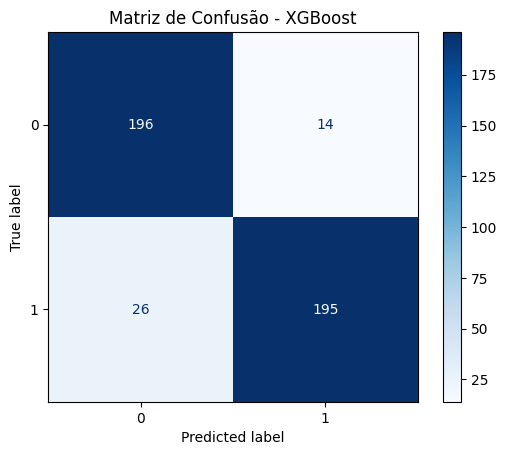

In [ ]:
# Exibindo os detalhes do melhor modelo
print(f"\nMelhor Modelo: {best_model_name}")
print(f"Acurácia: {best_accuracy_score:.4f}")

# Exibindo a matriz de confusão para o melhor modelo
conf_matrix = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.show()


## Otimização de hiperparametros

In [ ]:
# Definir o espaço de busca de hiperparâmetros para o melhor modelo
search_spaces = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'n_estimators': Integer(50, 200),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 10),
}

# Criar o objeto BayesSearchCV
opt = BayesSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1),
    search_spaces=search_spaces,
    n_iter=25,  # Número de iterações da busca bayesiana
    cv=5,  # Número de folds da validação cruzada
    scoring='accuracy',  # Metrica para otimizar
    random_state=54716,
    verbose=0)

# Executar a otimização
opt.fit(X_train, y_train)


BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate...
                             'gamma': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

Melhores hiperparâmetros encontrados: OrderedDict([('colsample_bytree', 0.6395561076380663), ('gamma', 1.8317252364907133), ('learning_rate', 0.03392777711173527), ('max_depth', 6), ('n_estimators', 200), ('subsample', 0.7653205482517411)])
Acurácia do modelo otimizado: 0.9071925754060325


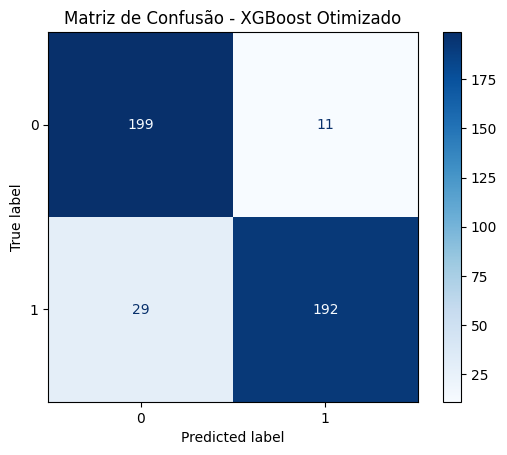

In [ ]:
# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:", opt.best_params_)

# Avaliar o modelo otimizado no conjunto de teste
y_pred_optimized = opt.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Acurácia do modelo otimizado:", accuracy_optimized)

# Exibindo a matriz de confusão para o melhor modelo otimizado
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
disp_optimized = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_optimized)
disp_optimized.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - XGBoost Otimizado')
plt.show()


## Calculo do limiar de probabilidade

Melhor limiar (threshold): 0.6471391320228577
AUC: 0.9628097392803275


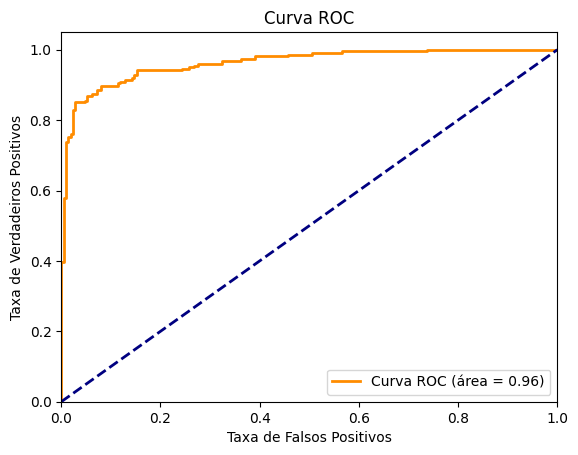

In [ ]:
# Obter as probabilidades de previsão para as classes
y_probs = opt.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Encontrar o limiar que maximiza a diferença entre TPR e FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Melhor limiar (threshold): {optimal_threshold}")
print(f"AUC: {roc_auc}")

# Visualizar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Previsões na lista de leads

In [ ]:
# Use o modelo otimizado para prever as probabilidades para o conjunto de validação
y_probs_validacao = opt.predict_proba(validacao[selected_features])[:, 1]

# Aplicar o limiar ótimo para obter as previsões binárias
y_pred_validacao = (y_probs_validacao >= optimal_threshold).astype(int)

# Criar um DataFrame com as previsões e as probabilidades
previsoes_df = pd.DataFrame({'user': validacao['user'], 'cartola_status': y_pred_validacao, 'probabilidade': y_probs_validacao})

# Substituir os valores 0 e 1 na coluna 'cartola_status' pelos labels originais 'Cartola Free', 'Não Cartola', e 'Cartola Pro'
previsoes_df['lead_cartola_status'] = np.where(previsoes_df['cartola_status'] == 1, 'Cartola Pro', 'Cartola Free')

# Exibir as previsões
display(previsoes_df.cartola_status.value_counts(normalize=True).reset_index())
display(previsoes_df.head())

,cartola_status,proportion
0,0,0.99162
1,1,0.00838


,user,cartola_status,probabilidade,lead_cartola_status
0,2062701,0,0.646410,Cartola Free
1,10118302,0,0.203750,Cartola Free
2,21021919,0,0.268796,Cartola Free
3,21025727,0,0.394137,Cartola Free
4,21187030,0,0.452406,Cartola Free


In [ ]:
leads = pd.merge(validacao,previsoes_df,how='inner',on='user')

In [ ]:
validacao_desnormalizado = leads.copy()
leads[cols_to_normalize] = scaler.inverse_transform(validacao_desnormalizado[cols_to_normalize])
leads['sexo'] = le.inverse_transform(leads['sexo'])
leads['device'] = np.where(leads['device_m_only'] == 1, 'm_only',
                  np.where(leads['device_pc_e_m'] == 1, 'pc_e_m',
                  np.where(leads['device_pc_only'] == 1,'pc_only',
                           'unknown')))
leads = leads.drop(['device_m_only', 'device_pc_e_m', 'device_pc_only'], axis=1)

In [ ]:
display(leads.head(10))

,user,sexo,idade,dias,pviews,visitas,tempo_total,futebol,futebol_intenacional,futebol_olimpico,...,canoagem,saltos_ornamentais,home,home_olimpiadas,loca_uf,ruido,cartola_status,probabilidade,lead_cartola_status,device
0,2062701,M,34.993072,21.0,107.0,40.0,23099.701,15908.94,134.14,4884.46,...,0.00,654.81,45.00,135.00,1,0,0,0.646410,Cartola Free,pc_only
1,10118302,M,50.000000,20.0,462.0,58.0,83242.863,14705.62,276.14,23180.58,...,484.89,0.00,13404.91,1455.30,0,0,0,0.203750,Cartola Free,pc_only
2,21021919,M,24.000000,28.0,484.0,136.0,47519.238,18704.70,2222.24,259.30,...,0.00,203.17,16311.21,2601.45,0,0,0,0.268796,Cartola Free,pc_e_m
3,21025727,F,37.000000,1.0,1.0,1.0,45.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0,0,0,0.394137,Cartola Free,pc_only
4,21187030,M,28.000000,1.0,1.0,1.0,45.000,0.00,0.00,0.00,...,0.00,0.00,45.00,0.00,0,0,0,0.452406,Cartola Free,pc_only
5,21296678,M,29.000000,2.0,2.0,2.0,90.000,90.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0,0,0,0.417129,Cartola Free,pc_only
6,21503221,M,47.000000,2.0,3.0,2.0,463.770,0.00,0.00,0.00,...,0.00,0.00,0.00,45.00,1,0,0,0.222861,Cartola Free,pc_only
7,21747900,M,31.000000,3.0,6.0,4.0,993.698,945.02,0.00,0.00,...,0.00,0.00,0.00,45.00,0,0,0,0.417129,Cartola Free,pc_only
8,22501096,M,55.000000,4.0,7.0,5.0,269.429,47.02,0.00,0.00,...,0.00,0.00,132.41,45.00,0,0,0,0.123911,Cartola Free,pc_only
9,23333679,M,33.000000,4.0,14.0,4.0,2173.046,2078.32,0.00,0.00,...,0.00,0.00,0.00,0.00,0,0,0,0.403773,Cartola Free,pc_only


In [ ]:
leads.to_csv('leads_cartola.csv', index=False)

Para compreender o que motiva um usuário a aderir à versão premium do Cartola, podemos analisar os dados disponíveis no arquivo `leads_cartola.csv`. A seguir, apresento uma análise baseada nas variáveis que podem influenciar a decisão de um usuário em optar pela versão Cartola Pro em vez da gratuita.

### **Análise das Variáveis Relevantes**

1. **Idade**:
   - A distribuição da idade entre usuários Cartola Free e Cartola Pro pode indicar se há uma faixa etária mais propensa a assinar a versão premium.

2. **Atividade (dias e pviews)**:
   - O número de dias ativos e as visualizações (pviews) são indicadores importantes de engajamento. Usuários com maior atividade tendem a ter mais chances de se tornarem assinantes.

3. **Tempo Total Gasto**:
   - O tempo total gasto na plataforma pode refletir o interesse do usuário. Quanto mais tempo um usuário passa no Cartola, maior a probabilidade de ele considerar a assinatura.

### **Resultados das Visualizações**

#### **1. Distribuição da Idade por Status do Lead**
O boxplot da idade mostra que:

- Usuários Cartola Pro tendem a ser mais jovens, enquanto os Cartola Free têm uma faixa etária mais ampla.
- A presença de outliers pode indicar usuários muito velhos que ainda estão ativos na versão gratuita.

#### **2. Pviews vs Tempo Total**
O gráfico de dispersão entre pviews e tempo total revela:

- Há uma concentração significativa de usuários Cartola Pro em áreas com maior número de pviews e tempo total gasto.
- Isso sugere que usuários com maior engajamento e visualizações estão mais inclinados a optar pela versão premium.

### **Conclusões e Recomendações**

1. **Foco na Faixa Etária Jovem**:
   - Considerar campanhas direcionadas para usuários mais jovens, que demonstram maior interesse em se tornar Cartola Pro.

2. **Estimular o Engajamento**:
   - Criar incentivos para aumentar o número de dias ativos e visualizações, como promoções ou conteúdos exclusivos para usuários ativos.

3. **Análise Contínua**:
   - Monitorar continuamente as métricas de engajamento para identificar padrões que possam ajudar a entender melhor o comportamento dos usuários.

4. **Feedback dos Usuários**:
   - Coletar feedback diretamente dos usuários sobre o que os motivaria a assinar a versão premium pode oferecer insights valiosos.

Essas análises podem ajudar a formular estratégias para aumentar tanto o engajamento quanto a receita do Cartola, focando nas características dos usuários que mais se beneficiam da versão premium.

## Apresentação básica

In [ ]:
!pip install python-pptx

In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Criação da apresentação
presentation = Presentation()

# Slide 1: Título
slide_1 = presentation.slides.add_slide(presentation.slide_layouts[0])
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]
title.text = "Desafio Cartola: Análise Preditiva"
subtitle.text = "Identificação de Fatores que Influenciam Assinaturas"

# Slide 2: Introdução
slide_2 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_2.shapes.title
content = slide_2.placeholders[1]
title.text = "Introdução"
content.text = ("O Cartola é um jogo eletrônico amplamente reconhecido no Brasil.\n"
                "O objetivo é identificar fatores que influenciam a propensão dos usuários "
                "a se tornarem assinantes da versão premium.")

# Slide 3: Metodologia
slide_3 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_3.shapes.title
content = slide_3.placeholders[1]
title.text = "Metodologia"
content.text = ("1. Coleta de Dados\n"
                "2. Análise Exploratória\n"
                "3. Pré-processamento\n"
                "4. Modelagem Preditiva")

# Slide 4: Análise Exploratória
slide_4 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_4.shapes.title
content = slide_4.placeholders[1]
title.text = "Análise Exploratória"
content.text = ("- Distribuição da variável target\n"
                "- Matriz de correlação\n"
                "- Análise de variáveis categóricas")

# Slide 5: Testes Estatísticos
slide_5 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_5.shapes.title
content = slide_5.placeholders[1]
title.text = "Testes Estatísticos"
content.text = ("- ANOVA e Kruskal-Wallis para variáveis numéricas\n"
                "- Teste de Levene para igualdade de variâncias")

# Slide 6: Pré-processamento
slide_6 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_6.shapes.title
content = slide_6.placeholders[1]
title.text = "Pré-processamento"
content.text = ("- Tratamento de valores ausentes\n"
                "- Codificação categórica\n"
                "- Normalização dos dados")

# Slide 7: Modelagem Preditiva
slide_7 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_7.shapes.title
content = slide_7.placeholders[1]
title.text = "Modelagem Preditiva"
content.text = ("- Algoritmos utilizados: Random Forest, XGBoost\n"
                "- Avaliação do modelo com métricas como precisão e recall")

# Slide 8: Conclusões
slide_8 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_8.shapes.title
content = slide_8.placeholders[1]
title.text = "Conclusões"
content.text = ("- Principais descobertas sobre os usuários\n"
                "- Sugestões para futuras análises e melhorias no modelo")

# Slide 9: Q&A
slide_9 = presentation.slides.add_slide(presentation.slide_layouts[1])
title = slide_9.shapes.title
content = slide_9.placeholders[1]
title.text = "Q&A"
content.text = "Espaço para perguntas e discussões."

# Salvar a apresentação
presentation.save("Desafio_Cartola_Presentacao.pptx")